In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange

In [3]:
V_ap = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/data/V_diff_stimseed1.npy")
V_full = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000].flatten()
V_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000].flatten()
V_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000].flatten()

V_na_diff = np.zeros((V_ap.shape[0]))
V_nona_diff = np.zeros((V_ap.shape[0]))
V_na_diff[:-1] = np.diff(V_na)
V_nona_diff[:-1] = np.diff(V_nona)


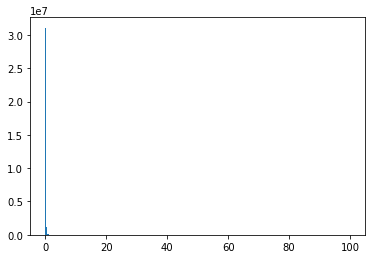

In [9]:
bins = np.arange(0,100,0.1)
plt.hist(np.abs(V_full - V_na), bins)
plt.show()

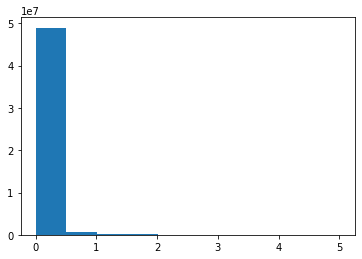

In [10]:
bins = np.arange(0,100,0.1)
plt.hist(np.abs(V_na-V_nona), bins)
plt.show()

In [3]:
raw_times = np.where(V_ap >= 3)[0]
spk_times = []

for i in range(raw_times.shape[0]):
    if i == 0:
        spk_times.append(raw_times[i])
    else:
        if raw_times[i-1] != raw_times[i] - 1:
            spk_times.append(raw_times[i])
            
spk_times = np.asarray(spk_times)
print(spk_times.shape[0])

spk = np.zeros((V_ap.shape[0]))
spk[spk_times] = 1
print(np.sum(spk))

9122
9122.0


In [4]:
#diff_min = -4
#diff_max = 0.6
#val_max = -54
#val_min = -68.5
interval = 0.1

diff_bins = np.arange(diff_min, diff_max+0.01, interval)
val_bins = np.arange(val_min, val_max+0.01, interval)
spk_2d_probs = np.empty((val_bins.shape[0]-1, diff_bins.shape[0]-1))

counts_2d = np.empty((val_bins.shape[0]-1, diff_bins.shape[0]-1))

for i in tnrange(val_bins.shape[0]-1):
    for j in range(diff_bins.shape[0]-1):
        idx = np.where((V_na>=val_bins[i]) & (V_na<val_bins[i+1]) & (V_na_diff>=diff_bins[j]) & (V_na_diff<diff_bins[j+1]))[0]
        #idx = np.where((V_nona>=val_bins[i]) & (V_nona<val_bins[i+1]) & (V_nona_diff>=diff_bins[j]) & (V_nona_diff<diff_bins[j+1]))[0]
        yes_count = np.sum(spk[idx])
        total_count = idx.shape[0]
        
        if total_count ==0:
            spk_2d_probs[i,j] = 0
            counts_2d[i,j] = 1
        else:
            spk_2d_probs[i,j] = yes_count / total_count
            counts_2d[i,j] = total_count

<ipython-input-4-cfc735326ba4>:13: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(val_bins.shape[0]-1):


  0%|          | 0/145 [00:00<?, ?it/s]

In [5]:
bins = np.arange(val_min, val_max+0.01, interval)
spk_probs = np.empty((bins.shape[0]-1))
counts = np.empty((bins.shape[0]-1))

for i in tnrange(bins.shape[0]-1):
    idx = np.where((V_na >= bins[i]) & (V_na < bins[i+1]))[0]
    #idx = np.where((V_nona >= bins[i]) & (V_nona < bins[i+1]))[0]
    yes_count = np.sum(spk[idx])
    total_count = idx.shape[0]
    spk_probs[i] = yes_count / total_count
    counts[i] = total_count

<ipython-input-5-33a26b422f54>:5: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(bins.shape[0]-1):


  0%|          | 0/145 [00:00<?, ?it/s]

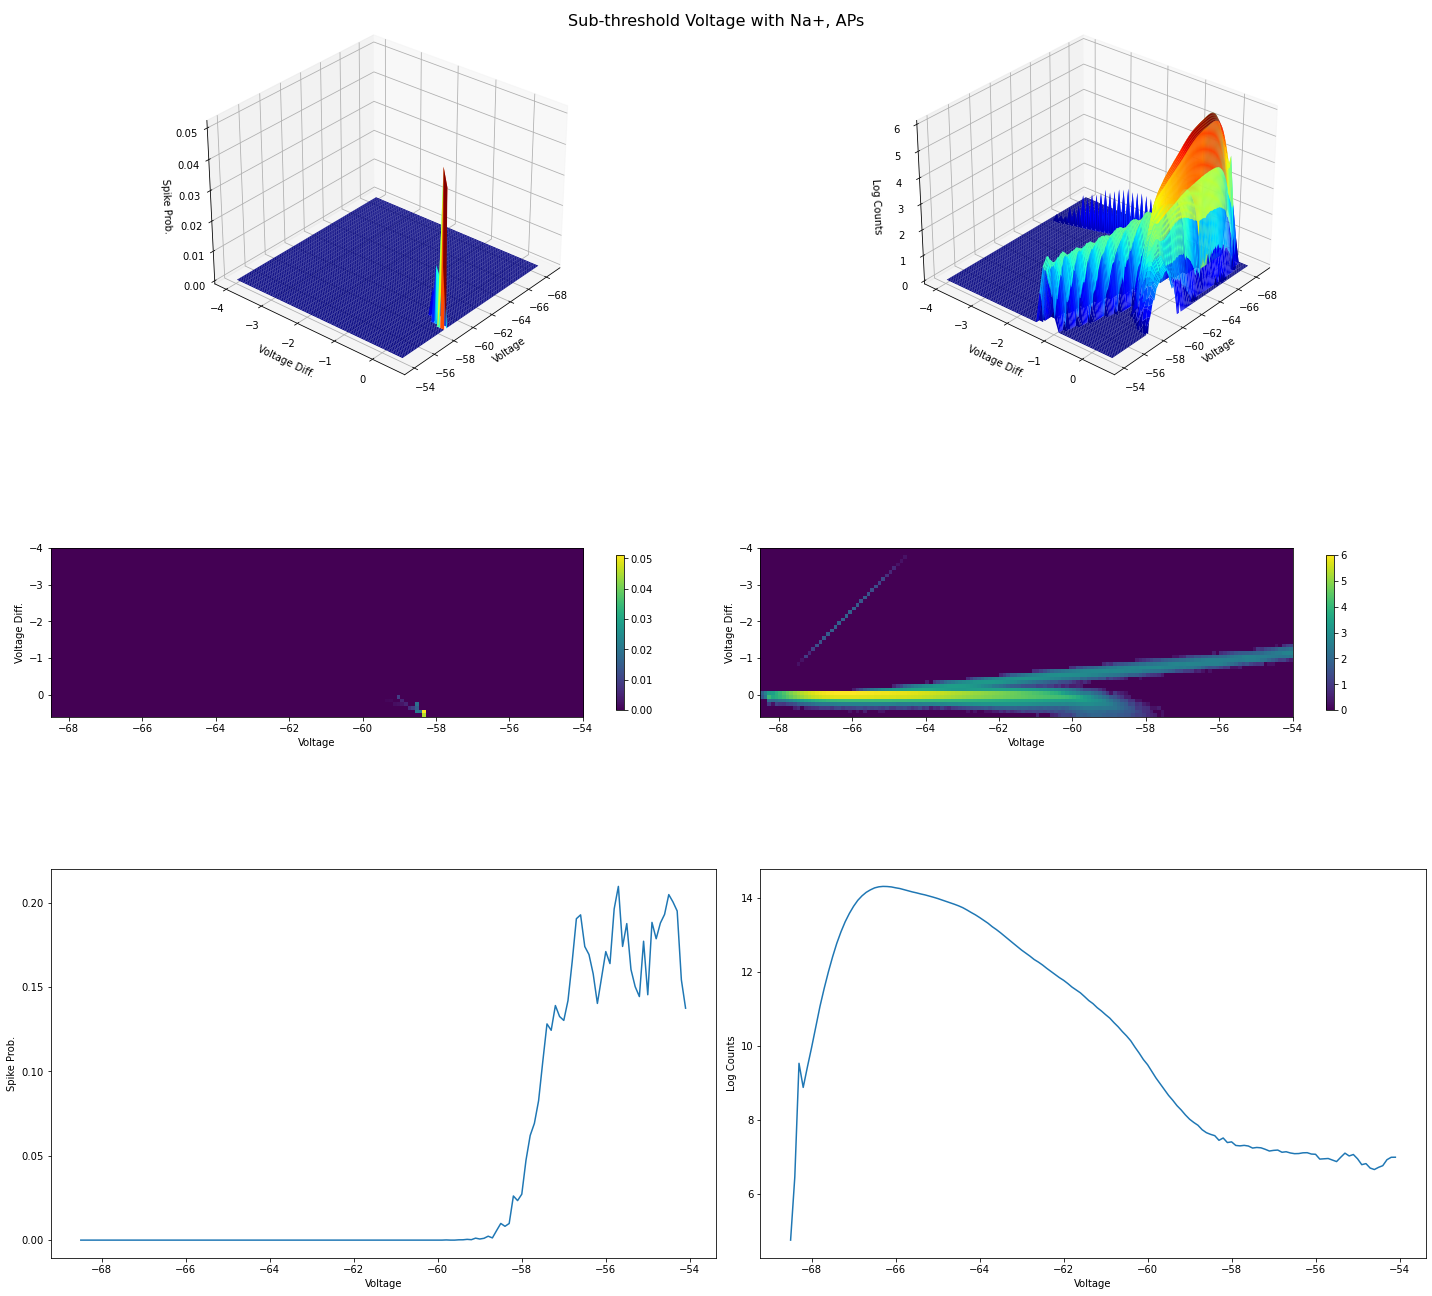

In [7]:
fig = plt.figure(figsize=(20,30))

ax1 = fig.add_subplot(5,2,1, projection='3d')
X, Y = np.meshgrid(val_bins[:-1], diff_bins[:-1])
probs1 = ax1.plot_surface(X, Y, spk_2d_probs.T, rstride=1, cstride=1,
                cmap='jet', edgecolor='none')
ax1.set_xlabel('Voltage')
ax1.set_ylabel('Voltage Diff.')
ax1.set_zlabel('Spike Prob.')
ax1.view_init(30, 40)

ax2 = fig.add_subplot(5,2,2, projection='3d')
probs1 = ax2.plot_surface(X, Y, np.log10(counts_2d.T), rstride=1, cstride=1,
                cmap='jet', edgecolor='none')
ax2.set_xlabel('Voltage')
ax2.set_ylabel('Voltage Diff.')
ax2.set_zlabel('Log Counts')
ax2.view_init(30, 40)

ax3 = fig.add_subplot(5,2,3)
extent = [val_min, val_max, diff_max, diff_min]
imshow1 = ax3.imshow(spk_2d_probs.T, extent=extent)
ax4 = fig.add_subplot(5,2,4)
imshow2 = ax4.imshow(np.log10(counts_2d.T), extent=extent)
plt.colorbar(imshow1, ax=ax3, shrink = 0.4)
plt.colorbar(imshow2, ax=ax4, shrink = 0.4)

ax3.set_xlabel("Voltage")
ax3.set_ylabel("Voltage Diff.")
ax4.set_xlabel("Voltage")
ax4.set_ylabel("Voltage Diff.")

ax5 = fig.add_subplot(5,2,5)
ax6 = fig.add_subplot(5,2,6)
ax5.plot(bins[:-1], spk_probs)
ax6.plot(bins[:-1], np.log(counts))
ax5.set_xlabel("Voltage")
ax5.set_ylabel("Spike Prob.")
ax6.set_ylabel("Log Counts")
ax6.set_xlabel("Voltage")

plt.suptitle("Sub-threshold Voltage with Na+, APs", fontsize=16)
fig.tight_layout()

#fig.savefig("/home/sklee/dendrite/AP_exp_AP.pdf", bbox_inches="tight", transparent=True)

<ipython-input-5-122b2c316ebb>:13: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(val_bins.shape[0]-1):


  0%|          | 0/72 [00:00<?, ?it/s]

(69000.0, 70000.0)

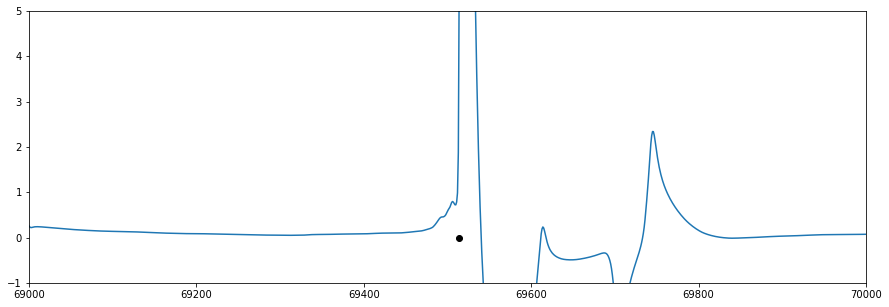

In [33]:
plt.figure(figsize = (15,5))
plt.plot(V_ap[:150000])
plt.scatter(spk_times[:20], np.zeros(20), color="black")
plt.ylim(-1,5)

plt.xlim(69000,70000)

(array([102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128]),)
(array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130]),)


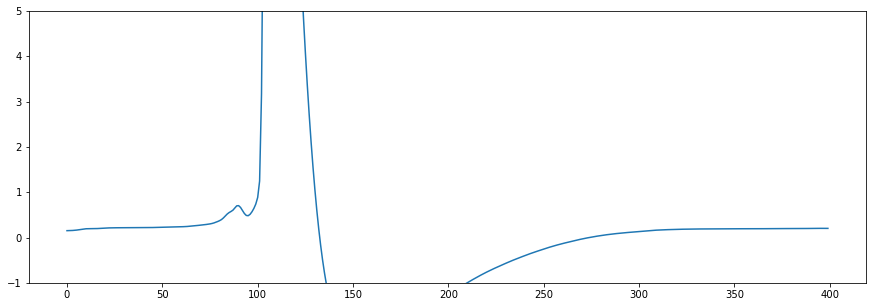

In [20]:
plt.figure(figsize = (15,5))
plt.plot(V_ap[:50000][20600:21000])
plt.ylim(-1,5)

print(np.where(V_ap[:50000][20600:21000] > 2))
print(np.where(V_ap[:50000][20600:21000] > 1))

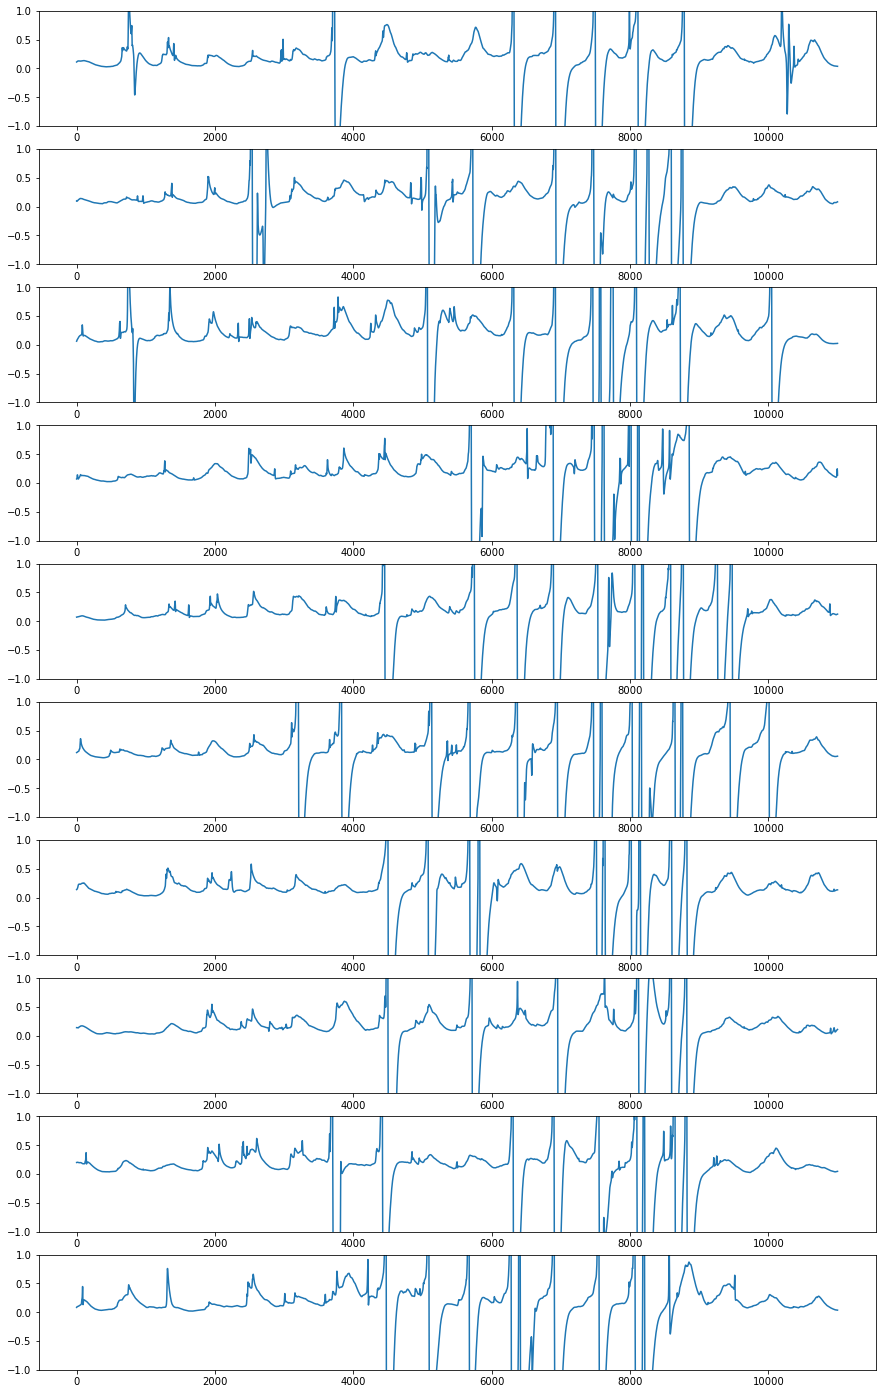

In [14]:
fig, axs = plt.subplots(nrows=10, figsize = (15,25))
for i in range(10):
    axs[i].plot(V_ap[50000*i:50000*(i+1)][17000:28000])
    axs[i].set_ylim(-1,1)